<a href="https://colab.research.google.com/github/zwubbena/sample-size-tables/blob/main/sample_size_table_enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ Configured Scenario A (80.0%, ±13.0%)
✓ Configured Scenario B (80.0%, ±15.1%)
✓ Configured Scenario C (80.0%, ±16.0%)

Testing sample size calculations:

Testing Scenario A (80.0%, ±13.0%):
  Population   10 → Sample   8 ✓
  Population  100 → Sample  20 ✓
  Population 1000 → Sample  24 ✓

CONFIGURATION SUMMARY
                  Scenario  Z-Score Confidence Margin  Proportion
Scenario A (80.0%, ±13.0%)     1.28      80.0% ±13.0%         0.5
Scenario B (80.0%, ±15.1%)     1.28      80.0% ±15.1%         0.5
Scenario C (80.0%, ±16.0%)     1.28      80.0% ±16.0%         0.5

▶ Created output folder: 20250807_sample_size_output
Starting sample size calculations...

▶ Processing Scenario A (80.0%, ±13.0%)...
  ▶ Creating post hoc table for Scenario A (80.0%, ±13.0%)...
▶ Processing Scenario B (80.0%, ±15.1%)...
  ▶ Creating post hoc table for Scenario B (80.0%, ±15.1%)...
▶ Processing Scenario C (80.0%, ±16.0%)...
  ▶ Creating post hoc table for Scenario C (80.0%, ±16.0%)...
▶ Creating comb

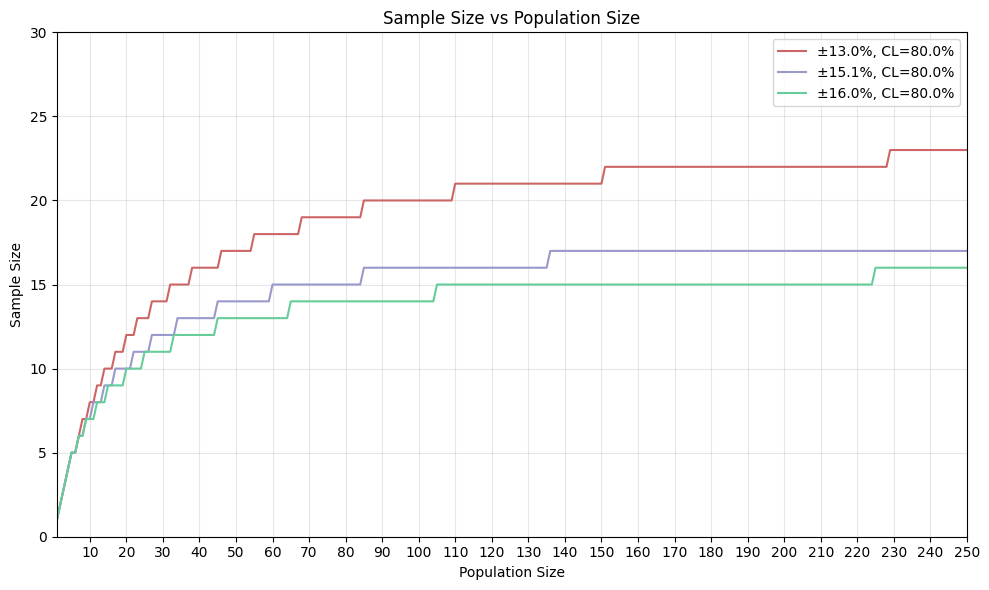

▶ Creating Excel workbook with separate Python code sheets and post hoc tables...
▶ Generating graph for Scenario A (80.0%, ±13.0%)...
▶ Generating graph for Scenario B (80.0%, ±15.1%)...
▶ Generating graph for Scenario C (80.0%, ±16.0%)...
✓ Excel file created: Sample_Size_Tables_Graphs.xlsx
✓ Added 3 post hoc sample size tables
✓ Added 3 post hoc Python code sheets
▶ Generating combined Python module with post hoc functions...
✓ Combined Python module saved: sample_size_functions.py
✓ Module includes 3 original + 3 post hoc functions
▶ Creating README documentation...
✓ README file updated with post hoc information
▶ Creating ZIP archive...
✓ ZIP archive created: 20250807_sample_size_analysis.zip

SAMPLE SIZE ANALYSIS COMPLETED SUCCESSFULLY!

Generated outputs for:
  • Scenario A (80.0%, ±13.0%)
  • Scenario B (80.0%, ±15.1%)
  • Scenario C (80.0%, ±16.0%)

All outputs packaged in: 20250807_sample_size_analysis.zip
  Date format: 20250807

Contents:
  📊 Excel file with all scenarios,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# =============================================================================
# Script Name : sample_size_table_enhanced.ipynb
# Purpose     : Calculate and visualize sample size tables for known populations
#               with different margin of errors and different confidence levels
#               AND generate Python code snippets for implementation
# Author      : Zane Wubbena, PhD
# Platform    : Google Colab
# Last Updated: 2025-08-05
# =============================================================================
#
# HOW TO CUSTOMIZE SCENARIOS:
# -------------------------
# 1. Modify the SCENARIOS array in Section 2 below
# 2. For each scenario, set:
#    - Z: Z-score (1.28=80%, 1.645=90%, 1.96=95%, 2.576=99%)
#    - Margin: Decimal margin of error (0.10=±10%, 0.15=±15%)
#    - Proportion: Expected proportion (use 0.50 for maximum variability)
# 3. Run the script - all outputs automatically update.
#
# Example: To change Scenario A to 95% confidence with ±10% margin:
#   "Z": 1.96,        # Changed from 1.28
#   "Margin": 0.10,   # Changed from 0.13
#
# HOW TO CUSTOMIZE DATE FORMAT:
# ----------------------------
# Change DATE_FORMAT in Section 2 to control output folder/file naming.
# Default includes date and time: 20250805_200119_sample_size_output.zip
#
# IMPORTANT: All names, descriptions, and code are dynamically generated.
# =============================================================================

# =============================================================================
# SECTION 1: Import Required Libraries
# =============================================================================

import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import shutil

from scipy import stats
from matplotlib.lines import Line2D
from datetime import datetime

!pip install -q xlsxwriter

# =============================================================================
# SECTION 2: User-Defined Parameters
# =============================================================================

# --- Scenario Control ---
RUN_SINGLE = False  # Set True to run only one scenario
SINGLE_SCENARIO_INDEX = 0  # Index of scenario to run if RUN_SINGLE = True

# Common z-score references for documentation
#  Z = 1.28  → 80% Confidence
#  Z = 1.645 → 90% Confidence
#  Z = 1.96  → 95% Confidence
#  Z = 2.576 → 99% Confidence

# --- Display Settings ---
POP_MIN = 1             # Minimum population size to display on the graph
POP_MAX = 250           # Maximum population size to display on the graph
# POP_MAX_ALL = 20000   # Total population size range used in calculations (not displayed)
SAMPLE_CAP = 30         # Maximum sample size shown on the graph

X_TICK_START = 0        # Starting point for x-axis ticks
X_TICK_INTERVAL = 10    # Interval between x-axis ticks

Y_TICK_START = 0        # Starting point for y-axis ticks
Y_TICK_INTERVAL = 5     # Interval between y-axis ticks

OUTPUT_DIR = "/content/"

# --- Date/Time Format Settings ---
# Choose preferred date format by uncommenting line of code:
# DATE_FORMAT = "%Y%m%d_%H%M%S"  # Default: 20250805_200119 (YYYYMMDD_HHMMSS)
DATE_FORMAT = "%Y%m%d"        # Just date: 20250805
# DATE_FORMAT = "%Y-%m-%d"      # With dashes: 2025-08-05
# DATE_FORMAT = "%b%d_%Y"       # Month name: Aug05_2025
# DATE_FORMAT = "%Y%m%d_v1"     # With version: 20250805_v1

# Date format components:
# %Y = 4-digit year (2025)
# %m = 2-digit month (08 for August)
# %d = 2-digit day (05)
# %H = Hour in 24-hour format (20 = 8 PM)
# %M = Minutes (01)
# %S = Seconds (19)
# %b = Abbreviated month name (Aug)

# --- Raw Scenario Values ---
# Modify these values to change the scenarios. All outputs will update automatically.
# Z-score examples: 1.28 (80%), 1.645 (90%), 1.96 (95%), 2.576 (99%)
# Margin: Decimal form of margin of error (e.g., 0.13 for ±13%)

# Margin of Error (ME) values below are set to the six-digit midpoints of the
# mutually exclusive ME ranges that yield sample sizes of 16 and 18 under the
# finite population correction formula. These values ensure accurate and stable
# modeling without overlap between adjacent sample size thresholds.

# ME = 0.150825 → corresponds to sample size of 18
# ME = 0.159994 → corresponds to sample size of 16
#
# Assumes:
# Confidence Level = 80% (z = 1.28)
# Population Proportion = 0.5
# Population Size = 20,000

SCENARIOS = [
    # Scenario A
    {
        "Z": 1.28,          # 80% confidence level
        "Margin": 0.13,     # ±13% margin of error
        "Proportion": 0.50,  # Expected proportion (0.5 = maximum variability)
        "LineStyle": "-",
        "LineColor": "#CC6666",
    },
    # Scenario B
    {
        "Z": 1.28,          # 80% confidence level
        "Margin": 0.150825,    # ±15.5% margin of error
        "Proportion": 0.50,
        "LineStyle": "-",
        "LineColor": "#9999CC",
    },
    # Scenario C
    {
        "Z": 1.28,          # 80% confidence level
        "Margin": 0.159994,     # ±16% margin of error
        "Proportion": 0.50,
        "LineStyle": "-",
        "LineColor": "#66CC99",
    },
]

# --- Validate and Process Scenarios ---
if len(SCENARIOS) > 26:
    print("⚠️ Warning: More than 26 scenarios. Letters will repeat after Z.")

# --- Dynamically Generate Scenario Names and Properties ---
for idx, scenario in enumerate(SCENARIOS):
    # Validate Z-score
    if scenario["Z"] <= 0:
        raise ValueError(f"Scenario {idx+1}: Z-score must be positive")

    # Validate Margin
    if not 0 < scenario["Margin"] < 1:
        raise ValueError(f"Scenario {idx+1}: Margin must be between 0 and 1")

    # Validate Proportion
    if not 0 < scenario["Proportion"] <= 1:
        raise ValueError(f"Scenario {idx+1}: Proportion must be between 0 and 1")

    # Calculate confidence level from Z-score
    confidence = round(2 * stats.norm.cdf(scenario["Z"]) - 1, 4)
    confidence_pct = round(confidence * 100, 1)
    margin_pct = round(scenario['Margin'] * 100, 1)

    # Store calculated values for reuse throughout the script
    scenario["Confidence"] = confidence
    scenario["ConfidencePct"] = confidence_pct
    scenario["MarginPct"] = margin_pct
    scenario["Letter"] = chr(65 + (idx % 26))  # Handles > 26 scenarios

    # Generate dynamic name - this will be used everywhere
    scenario["Name"] = f"Scenario {scenario['Letter']} ({confidence_pct}%, ±{margin_pct}%)"

    print(f"✓ Configured {scenario['Name']}")

# =============================================================================
# SECTION 3: Sample Size Calculation Function and Helpers
# =============================================================================

def calculate_sample_size(N, e, p, z):
    """
    Calculate sample size with finite population correction.

    Parameters:
    N: Population size
    e: Margin of error (decimal form)
    p: Expected proportion (typically 0.5)
    z: Z-score for desired confidence level
    """
    if N < 1:
        raise ValueError("Population must be >= 1")

    numerator = (z ** 2) * p * (1 - p)
    denominator = e ** 2
    n_0 = numerator / denominator
    adjusted_n = n_0 / (1 + ((n_0 - 1) / N))
    return min(math.ceil(adjusted_n), N)

def test_sample_size_calculation():
    """Test function to verify calculations are working correctly."""
    test_cases = [
        {"pop": 10, "expected_range": (3, 10)},
        {"pop": 100, "expected_range": (10, 50)},
        {"pop": 1000, "expected_range": (20, 100)},
    ]

    print("\nTesting sample size calculations:")
    for scenario in SCENARIOS[:1]:  # Test first scenario
        print(f"\nTesting {scenario['Name']}:")
        for test in test_cases:
            sample = calculate_sample_size(
                test["pop"],
                scenario["Margin"],
                scenario["Proportion"],
                scenario["Z"]
            )
            in_range = test["expected_range"][0] <= sample <= test["expected_range"][1]
            status = "✓" if in_range else "✗"
            print(f"  Population {test['pop']:4d} → Sample {sample:3d} {status}")

    return True

# Run test
test_sample_size_calculation()

# =============================================================================
# NEW SECTION: Post Hoc Sample Size Table Functions
# =============================================================================

def parse_population_range_detailed(range_str):
    """Parse population range string to get min and max values with detailed handling."""
    range_str = str(range_str).strip()
    if '-' in range_str:
        parts = range_str.split('-')
        return int(parts[0]), int(parts[1])
    else:
        return int(range_str), int(range_str)

def create_post_hoc_sample_size_table(original_grouped_df):
    """
    Create post hoc sample size table by applying downward merging rules.

    Business Rules:
    - Rule 1: Odd-numbered sample sizes reassigned downward to next lower even-numbered sample size
    - Rule 2: Population range boundaries - lowest from even group, highest from odd group being merged
    - Rule 3: Logical coherence - sample size ≤ smallest population size
    - Rule 4: Range continuity and exclusivity
    - Rule 5: Population size 1 requires full census
    - Rule 6: Consolidation outcome

    Parameters:
    original_grouped_df: DataFrame with Sample_Size and Population_Range columns

    Returns:
    DataFrame: Post hoc sample size table
    """

    # Create a copy to work with
    df = original_grouped_df.copy().sort_values('Sample_Size').reset_index(drop=True)

    # Initialize the post hoc table
    post_hoc_rows = []
    i = 0

    while i < len(df):
        current_sample = df.iloc[i]['Sample_Size']
        current_range = df.iloc[i]['Population_Range']

        # Rule 5: Handle population size 1 (census case)
        if current_sample == 1:
            post_hoc_rows.append({
                'Sample_Size': f"{current_sample}*",
                'Population_Range': current_range
            })
            i += 1
            continue

        # Check if this is an even-numbered sample size
        if current_sample % 2 == 0:
            # Look ahead to see if next sample size is odd (needs merging)
            if i + 1 < len(df) and df.iloc[i + 1]['Sample_Size'] % 2 == 1:
                # Merge the odd sample size down to this even sample size
                next_sample = df.iloc[i + 1]['Sample_Size']
                next_range = df.iloc[i + 1]['Population_Range']

                # Rule 2: Take lowest from even, highest from odd
                even_min, even_max = parse_population_range_detailed(current_range)
                odd_min, odd_max = parse_population_range_detailed(next_range)

                # Combine ranges
                combined_min = even_min
                combined_max = odd_max

                if combined_min == combined_max:
                    combined_range = str(combined_min)
                else:
                    combined_range = f"{combined_min}-{combined_max}"

                post_hoc_rows.append({
                    'Sample_Size': current_sample,
                    'Population_Range': combined_range
                })

                # Skip the next (odd) entry since we merged it
                i += 2
            else:
                # Even sample size with no odd to merge
                post_hoc_rows.append({
                    'Sample_Size': current_sample,
                    'Population_Range': current_range
                })
                i += 1
        else:
            # This is an odd sample size that should have been merged down
            # This case shouldn't occur if we process in order, but handle gracefully
            print(f"Warning: Unmerged odd sample size {current_sample} encountered")
            i += 1

    # Create the final DataFrame
    post_hoc_df = pd.DataFrame(post_hoc_rows)

    return post_hoc_df

# =============================================================================
# EXISTING SECTION: Python Code Generation Functions
# =============================================================================

def parse_population_range(range_str):
    """Parse population range string to get min and max values."""
    if '-' in str(range_str):
        parts = str(range_str).split('-')
        return int(parts[0]), int(parts[1])
    else:
        return int(range_str), int(range_str)

def generate_python_code(scenario_name, scenario_letter, grouped_df, z_score, margin_pct, confidence_pct):
    """
    Generate Python code snippet for a given scenario's sample size table.
    """
    # Start building the Python code
    code_lines = []

    # Add header comment
    code_lines.append(f'"""\nSample Size Assignment Function')
    code_lines.append(f'Scenario: {scenario_name}')
    code_lines.append(f'Confidence Level: {confidence_pct}%')
    code_lines.append(f'Margin of Error: ±{margin_pct}%')
    code_lines.append(f'Z-Score: {z_score}')
    code_lines.append(f'Generated on: {datetime.now().strftime("%Y-%m-%d")}')
    code_lines.append('"""\n')

    # Function definition using scenario letter
    func_name = f"get_sample_size_{scenario_letter.lower()}"
    code_lines.append(f'def {func_name}(population):')
    code_lines.append('    """')
    code_lines.append(f'    Returns sample size for {scenario_name}.')
    code_lines.append(f'    Confidence Level: {confidence_pct}%, Margin of Error: ±{margin_pct}%')
    code_lines.append('    ')
    code_lines.append('    Parameters:')
    code_lines.append('    population (int): Population size')
    code_lines.append('    ')
    code_lines.append('    Returns:')
    code_lines.append('    int: Required sample size')
    code_lines.append('    """')

    # Generate if-elif statements
    for idx, row in grouped_df.iterrows():
        sample_size = row['Sample_Size']
        # Handle census notation in post hoc tables
        if str(sample_size).endswith('*'):
            sample_size_clean = str(sample_size).replace('*', '')
        else:
            sample_size_clean = str(sample_size)

        pop_range = row['Population_Range']
        pop_min, pop_max = parse_population_range(pop_range)

        if idx == 0:
            if pop_min == pop_max:
                code_lines.append(f'    if population == {pop_min}:')
            else:
                code_lines.append(f'    if {pop_min} <= population <= {pop_max}:')
        else:
            if pop_min == pop_max:
                code_lines.append(f'    elif population == {pop_min}:')
            else:
                code_lines.append(f'    elif {pop_min} <= population <= {pop_max}:')

        code_lines.append(f'        return {sample_size_clean}')

    # Add else clause for populations beyond the table
    max_pop = grouped_df.iloc[-1]["Population_Range"].split("-")[-1] if "-" in str(grouped_df.iloc[-1]["Population_Range"]) else grouped_df.iloc[-1]["Population_Range"]
    last_sample = str(grouped_df.iloc[-1]["Sample_Size"]).replace('*', '')
    code_lines.append('    else:')
    code_lines.append(f'        # For populations > {max_pop}')
    code_lines.append(f'        return {last_sample}')

    return '\n'.join(code_lines)

def generate_dataframe_code(scenario_name, scenario_letter, grouped_df):
    """
    Generate Python code that applies sample sizes to a pandas DataFrame.
    """
    func_name = f"get_sample_size_{scenario_letter.lower()}"

    code_lines = []
    code_lines.append('\n# Example usage with pandas DataFrame:')
    code_lines.append('import pandas as pd')
    code_lines.append('import numpy as np\n')

    code_lines.append(f'def apply_sample_sizes_{scenario_letter.lower()}(df, population_col):')
    code_lines.append('    """')
    code_lines.append('    Apply sample sizes to a dataframe based on population column.')
    code_lines.append('    ')
    code_lines.append('    Parameters:')
    code_lines.append('    df (pd.DataFrame): Input dataframe')
    code_lines.append('    population_col (str): Name of column containing population counts')
    code_lines.append('    ')
    code_lines.append('    Returns:')
    code_lines.append('    pd.DataFrame: DataFrame with added SAMPLE_SIZE column')
    code_lines.append('    """')
    code_lines.append('    df = df.copy()')
    code_lines.append(f'    df["SAMPLE_SIZE"] = df[population_col].apply({func_name})')
    code_lines.append('    return df\n')

    code_lines.append('# Example:')
    code_lines.append('# data = {')
    code_lines.append('#     "DISTRICT_ID": ["D001", "D002", "D003", "D004", "D005"],')
    code_lines.append('#     "POPULATION": [5, 25, 50, 100, 250]')
    code_lines.append('# }')
    code_lines.append('# df = pd.DataFrame(data)')
    code_lines.append(f'# result = apply_sample_sizes_{scenario_letter.lower()}(df, "POPULATION")')
    code_lines.append('# print(result)')

    return '\n'.join(code_lines)

def generate_csv_export_code(scenario_name, scenario_letter, grouped_df):
    """
    Generate code to export the sample size table as CSV.
    """
    code_lines = []
    code_lines.append('\n# Export sample size table to CSV:')
    code_lines.append('sample_size_table = pd.DataFrame({')
    code_lines.append('    "Sample_Size": [')

    # Add sample sizes
    sizes = ', '.join(f'"{s}"' if str(s).endswith('*') else str(s) for s in grouped_df['Sample_Size'].tolist())
    code_lines.append(f'        {sizes}')
    code_lines.append('    ],')
    code_lines.append('    "Population_Range": [')

    # Add population ranges
    ranges = ', '.join(f'"{r}"' for r in grouped_df['Population_Range'].tolist())
    code_lines.append(f'        {ranges}')
    code_lines.append('    ]')
    code_lines.append('})')
    code_lines.append(f'\n# Save to CSV')
    code_lines.append(f'# sample_size_table.to_csv("sample_size_table_{scenario_letter.lower()}.csv", index=False)')

    return '\n'.join(code_lines)

# =============================================================================
# SECTION 4: Display Configuration Summary
# =============================================================================

print("\n" + "="*60)
print("CONFIGURATION SUMMARY")
print("="*60)

# Create summary table
config_df = pd.DataFrame([
    {
        "Scenario": s["Name"],
        "Z-Score": s["Z"],
        "Confidence": f"{s['ConfidencePct']}%",
        "Margin": f"±{s['MarginPct']}%",
        "Proportion": s["Proportion"]
    }
    for s in SCENARIOS
])

print(config_df.to_string(index=False))
print("="*60 + "\n")

# =============================================================================
# SECTION 5: Create Output Directory Structure
# =============================================================================

# Create a timestamped folder for all outputs
# Uses the DATE_FORMAT specified in the configuration section
today_str = datetime.today().strftime(DATE_FORMAT)

output_folder_name = f"{today_str}_sample_size_output"
output_folder_path = os.path.join(OUTPUT_DIR, output_folder_name)

# Create subdirectories
os.makedirs(output_folder_path, exist_ok=True)
images_folder = os.path.join(output_folder_path, "images")
python_folder = os.path.join(output_folder_path, "python_code")
os.makedirs(images_folder, exist_ok=True)
os.makedirs(python_folder, exist_ok=True)

print(f"▶ Created output folder: {output_folder_name}")

# =============================================================================
# SECTION 6: Run All or Single Scenario(s)
# =============================================================================

scenarios_to_run = [SCENARIOS[SINGLE_SCENARIO_INDEX]] if RUN_SINGLE else SCENARIOS
plot_df = pd.DataFrame()
scenario_summary = []

print("Starting sample size calculations...\n")

for scenario in scenarios_to_run:
    name = scenario["Name"]
    z = scenario["Z"]
    e = scenario["Margin"]
    p = scenario["Proportion"]
    confidence_pct = scenario["ConfidencePct"]
    margin_pct = scenario["MarginPct"]

    print(f"▶ Processing {name}...")

    # Generate full sample size dataset
    df = pd.DataFrame({
        "Population_Size": range(1, 20001)
    })
    df["Sample_Size"] = df["Population_Size"].apply(lambda N: calculate_sample_size(N, e, p, z))
    df["Truncated_Sample_Size"] = df["Sample_Size"].apply(lambda x: min(x, SAMPLE_CAP))

    # Group population ranges by sample size
    grouped = df.groupby("Sample_Size")["Population_Size"].agg(["min", "max"]).reset_index()
    grouped["Population_Range"] = grouped.apply(
        lambda row: f"{row['min']}" if row["min"] == row["max"]
        else f"{row['min']}-{row['max']}", axis=1
    )
    grouped = grouped[["Sample_Size", "Population_Range"]]

    # Create post hoc sample size table
    print(f"  ▶ Creating post hoc table for {name}...")
    post_hoc_grouped = create_post_hoc_sample_size_table(grouped)

    # Generate Python code for this scenario (original)
    python_code = generate_python_code(name, scenario["Letter"], grouped, z, margin_pct, confidence_pct)
    dataframe_code = generate_dataframe_code(name, scenario["Letter"], grouped)
    csv_code = generate_csv_export_code(name, scenario["Letter"], grouped)
    full_code = python_code + '\n' + dataframe_code + '\n' + csv_code

    # Generate Python code for post hoc table
    post_hoc_name = f"{name} (Post Hoc)"
    post_hoc_python_code = generate_python_code(post_hoc_name, scenario["Letter"] + "_PostHoc", post_hoc_grouped, z, margin_pct, confidence_pct)
    post_hoc_dataframe_code = generate_dataframe_code(post_hoc_name, scenario["Letter"] + "_PostHoc", post_hoc_grouped)
    post_hoc_csv_code = generate_csv_export_code(post_hoc_name, scenario["Letter"] + "_PostHoc", post_hoc_grouped)
    post_hoc_full_code = post_hoc_python_code + '\n' + post_hoc_dataframe_code + '\n' + post_hoc_csv_code

    scenario["PythonCode"] = full_code
    scenario["PostHocPythonCode"] = post_hoc_full_code

    # Save summary info
    max_sample = df["Sample_Size"].max()
    scenario_summary.append({
        "Scenario": name,
        "Z-Score": z,
        "Confidence_Level": f"{confidence_pct}%",
        "Margin_of_Error": f"±{margin_pct}%",
        "Max_Sample_Size": max_sample
    })

    # Save plot-specific data
    temp = df[df["Population_Size"].between(POP_MIN, POP_MAX)].copy()
    temp["Scenario"] = name
    temp["LineStyle"] = scenario["LineStyle"]
    temp["LineColor"] = scenario["LineColor"]
    plot_df = pd.concat([plot_df, temp], ignore_index=True)

    # Save grouped range data for Excel
    scenario["DataFrame_Grouped"] = grouped
    scenario["DataFrame_PostHoc"] = post_hoc_grouped

# =============================================================================
# SECTION 7: Create Line Graph
# =============================================================================

print("▶ Creating combined line graph...")
plt.figure(figsize=(10, 6))

for scenario in scenarios_to_run:
    temp = plot_df[plot_df["Scenario"] == scenario["Name"]]

    # Use pre-calculated values for consistency
    label = f"±{scenario['MarginPct']}%, CL={scenario['ConfidencePct']}%"

    # Plot each scenario
    plt.plot(
        temp["Population_Size"],
        temp["Truncated_Sample_Size"],
        label=label,
        linestyle=scenario["LineStyle"],
        color=scenario["LineColor"],
        linewidth=1.5
    )

plt.xlabel("Population Size")
plt.ylabel(f"Sample Size")
plt.title("Sample Size vs Population Size")
plt.xticks(range(X_TICK_START, POP_MAX + 1, X_TICK_INTERVAL))
plt.yticks(range(0, SAMPLE_CAP+1, Y_TICK_INTERVAL))
plt.ylim(0, SAMPLE_CAP)
plt.xlim(POP_MIN, POP_MAX)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()

# Save plot image
graph_path = os.path.join(images_folder, "all_scenarios_plot.png")
plt.savefig(graph_path, dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# SECTION 8: Export to Excel with Separate Python Code Sheets AND Post Hoc Tables
# =============================================================================

print("▶ Creating Excel workbook with separate Python code sheets and post hoc tables...")
excel_filename = "Sample_Size_Tables_Graphs.xlsx"
excel_path = os.path.join(output_folder_path, excel_filename)
summary_df = pd.DataFrame(scenario_summary)

with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
    workbook = writer.book

    # Define formats
    header_format = workbook.add_format({
        'bold': True,
        'bg_color': '#F7F7F8',
        'border': 1,
        'align': 'center',
        'valign': 'vcenter'
    })

    code_format = workbook.add_format({
        'font_name': 'Courier New',
        'font_size': 10,
        'bg_color': '#F5F5F5',
        'text_wrap': False,
        'valign': 'top'
    })

    # Format for post hoc tables
    posthoc_header_format = workbook.add_format({
        'bold': True,
        'bg_color': '#E8F4F8',
        'border': 1,
        'align': 'center',
        'valign': 'vcenter'
    })

    # Sheet 1: Scenario Summary + All-Scenario Graph
    summary_df.to_excel(writer, sheet_name="Scenario Summary", index=False)
    summary_ws = writer.sheets["Scenario Summary"]
    summary_ws.set_column('A:E', 22)

    # Apply header format to Scenario Summary
    for col_num, value in enumerate(summary_df.columns.values):
        summary_ws.write(0, col_num, value, header_format)

    if os.path.exists(graph_path):
        summary_ws.insert_image("A7", graph_path, {"x_scale": 0.8, "y_scale": 0.8})

    # Create individual sheets for each scenario (data sheet + python sheet + post hoc table)
    for scenario in scenarios_to_run:
        scenario_name = scenario["Name"]
        scenario_letter = scenario["Letter"]
        grouped = scenario["DataFrame_Grouped"]
        post_hoc_grouped = scenario["DataFrame_PostHoc"]
        python_code = scenario["PythonCode"]
        post_hoc_python_code = scenario["PostHocPythonCode"]

        # Create scenario-specific graph
        print(f"▶ Generating graph for {scenario_name}...")
        plt.figure(figsize=(10, 6))
        temp = plot_df[plot_df["Scenario"] == scenario_name]
        plt.plot(
            temp["Population_Size"],
            temp["Truncated_Sample_Size"],
            label=scenario_name,
            linestyle=scenario["LineStyle"],
            color=scenario["LineColor"],
            linewidth=2
        )
        plt.xlabel("Population Size")
        plt.ylabel(f"Sample Size")
        plt.title(f"Sample Size vs Population Size\n{scenario_name}")
        plt.xticks(range(X_TICK_START, POP_MAX + 1, X_TICK_INTERVAL))
        plt.yticks(range(0, SAMPLE_CAP + 1, Y_TICK_INTERVAL))
        plt.ylim(0, SAMPLE_CAP)
        plt.xlim(POP_MIN, POP_MAX)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='upper right')
        plt.tight_layout()

        # Save unique graph for this scenario
        graph_filename = f"scenario_{scenario_letter}_plot.png"
        graph_path_scenario = os.path.join(images_folder, graph_filename)
        plt.savefig(graph_path_scenario, dpi=300, bbox_inches='tight')
        plt.close()

        # Sheet: Scenario Data and Graph (Original)
        grouped.to_excel(writer, sheet_name=scenario_name, index=False)
        ws = writer.sheets[scenario_name]
        ws.set_column('A:B', 25)

        # Apply header format
        for col_num, value in enumerate(grouped.columns.values):
            ws.write(0, col_num, value, header_format)

        if os.path.exists(graph_path_scenario):
            ws.insert_image("C2", graph_path_scenario, {"x_scale": 0.8, "y_scale": 0.8})

        # Sheet: Python Code for this scenario (Original)
        code_sheet_name = f"Scenario {scenario_letter} (Python)"
        code_ws = workbook.add_worksheet(code_sheet_name)
        code_ws.set_column('A:A', 100)  # Wide column for code

        # Write header
        code_ws.write(0, 0, f"Python Code for {scenario_name}", header_format)

        # Write code line by line
        row = 2
        for line in python_code.split('\n'):
            code_ws.write(row, 0, line, code_format)
            row += 1

        # NEW: Sheet for Post Hoc Table
        post_hoc_sheet_name = f"Scenario {scenario_letter} (Post Hoc Table)"
        post_hoc_grouped.to_excel(writer, sheet_name=post_hoc_sheet_name, index=False)
        post_hoc_ws = writer.sheets[post_hoc_sheet_name]
        post_hoc_ws.set_column('A:B', 25)

        # Apply post hoc header format
        for col_num, value in enumerate(post_hoc_grouped.columns.values):
            post_hoc_ws.write(0, col_num, value, posthoc_header_format)

        # Add explanation note
        post_hoc_ws.write(len(post_hoc_grouped) + 2, 0, "* Indicates full census — entire population must be selected.",
                         workbook.add_format({'italic': True, 'font_size': 10}))

        # Add transformation notes
        post_hoc_ws.write(len(post_hoc_grouped) + 4, 0, "Post Hoc Table Rules Applied:",
                         workbook.add_format({'bold': True, 'font_size': 11}))
        post_hoc_ws.write(len(post_hoc_grouped) + 5, 0, "• Odd-numbered sample sizes merged downward to even-numbered sizes")
        post_hoc_ws.write(len(post_hoc_grouped) + 6, 0, "• Population ranges expanded through systematic consolidation")
        post_hoc_ws.write(len(post_hoc_grouped) + 7, 0, "• Maintains logical coherence (sample size ≤ population size)")

        # NEW: Sheet for Post Hoc Python Code
        post_hoc_code_sheet_name = f"Scenario {scenario_letter} (Post Hoc Python)"
        post_hoc_code_ws = workbook.add_worksheet(post_hoc_code_sheet_name)
        post_hoc_code_ws.set_column('A:A', 100)  # Wide column for code

        # Write header
        post_hoc_code_ws.write(0, 0, f"Post Hoc Python Code for {scenario_name}", posthoc_header_format)

        # Write code line by line
        row = 2
        for line in post_hoc_python_code.split('\n'):
            post_hoc_code_ws.write(row, 0, line, code_format)
            row += 1

        # Save Python code as separate files
        code_filename = f"sample_size_{scenario['Letter'].lower()}.py"
        code_path = os.path.join(python_folder, code_filename)
        with open(code_path, 'w') as f:
            f.write(python_code)

        # Save Post Hoc Python code as separate file
        post_hoc_code_filename = f"sample_size_{scenario['Letter'].lower()}_post_hoc.py"
        post_hoc_code_path = os.path.join(python_folder, post_hoc_code_filename)
        with open(post_hoc_code_path, 'w') as f:
            f.write(post_hoc_python_code)

print(f"✓ Excel file created: {excel_filename}")
print(f"✓ Added {len(scenarios_to_run)} post hoc sample size tables")
print(f"✓ Added {len(scenarios_to_run)} post hoc Python code sheets")

# =============================================================================
# SECTION 9: Generate Combined Python Module (Updated with Post Hoc Functions)
# =============================================================================

print("▶ Generating combined Python module with post hoc functions...")

combined_code = []
combined_code.append('"""')
combined_code.append('Combined Sample Size Assignment Functions (Original + Post Hoc)')
combined_code.append(f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')
combined_code.append('')
combined_code.append('Configuration:')
for s in scenarios_to_run:
    combined_code.append(f'  {s["Name"]}: Z={s["Z"]}, CL={s["ConfidencePct"]}%, ME=±{s["MarginPct"]}%')
combined_code.append('')
combined_code.append('This module contains sample size assignment functions for all configured scenarios.')
combined_code.append('Both original (statistically derived) and post hoc (business rules applied) versions included.')
combined_code.append('"""')
combined_code.append('')
combined_code.append('import pandas as pd')
combined_code.append('import numpy as np')
combined_code.append('')

# Add all scenario functions (original and post hoc)
for scenario in scenarios_to_run:
    scenario_name = scenario["Name"]
    scenario_letter = scenario["Letter"]
    grouped = scenario["DataFrame_Grouped"]
    post_hoc_grouped = scenario["DataFrame_PostHoc"]
    z = scenario["Z"]
    confidence_pct = scenario["ConfidencePct"]
    margin_pct = scenario["MarginPct"]

    # Generate original function code
    func_code = generate_python_code(scenario_name, scenario_letter, grouped, z, margin_pct, confidence_pct)
    combined_code.append(func_code)
    combined_code.append('')

    # Generate post hoc function code
    post_hoc_name = f"{scenario_name} (Post Hoc)"
    post_hoc_func_code = generate_python_code(post_hoc_name, scenario_letter + "_PostHoc", post_hoc_grouped, z, margin_pct, confidence_pct)
    combined_code.append(post_hoc_func_code)
    combined_code.append('')

# Add master functions that can handle all scenarios
combined_code.append('def get_sample_size(population, confidence_level=None, margin_of_error=None, scenario="A", use_post_hoc=False):')
combined_code.append('    """')
combined_code.append('    Master function to get sample size based on scenario or parameters.')
combined_code.append('    ')
combined_code.append('    Parameters:')
combined_code.append('    population (int): Population size')
combined_code.append('    confidence_level (float): Confidence level (e.g., 0.80 for 80%)')
combined_code.append('    margin_of_error (float): Margin of error (e.g., 0.13 for ±13%)')
combined_code.append('    scenario (str): Scenario letter (A, B, C, etc.) if not using custom parameters')
combined_code.append('    use_post_hoc (bool): Use post hoc table (business rules applied) instead of original')
combined_code.append('    ')
combined_code.append('    Returns:')
combined_code.append('    int: Required sample size')
combined_code.append('    """')
combined_code.append('    ')
combined_code.append('    # Map scenarios to functions')
combined_code.append('    if use_post_hoc:')
combined_code.append('        scenario_map = {')

for scenario in scenarios_to_run:
    letter = scenario["Letter"]
    combined_code.append(f'            "{letter}": get_sample_size_{letter.lower()}_posthoc,')

combined_code.append('        }')
combined_code.append('    else:')
combined_code.append('        scenario_map = {')

for scenario in scenarios_to_run:
    letter = scenario["Letter"]
    combined_code.append(f'            "{letter}": get_sample_size_{letter.lower()},')

combined_code.append('        }')
combined_code.append('    ')
combined_code.append('    if scenario.upper() in scenario_map:')
combined_code.append('        return scenario_map[scenario.upper()](population)')
combined_code.append('    else:')
combined_code.append('        raise ValueError(f"Unknown scenario: {scenario}. Available: {list(scenario_map.keys())}")')

# Add usage examples
combined_code.append('')
combined_code.append('')
combined_code.append('# Usage Examples:')
combined_code.append('# -------------')
combined_code.append('# 1. Direct function call (original):')
combined_code.append('#    sample_size = get_sample_size_a(population=150)')
combined_code.append('#')
combined_code.append('# 2. Direct function call (post hoc):')
combined_code.append('#    sample_size = get_sample_size_a_posthoc(population=150)')
combined_code.append('#')
combined_code.append('# 3. Using master function (original):')
combined_code.append('#    sample_size = get_sample_size(population=150, scenario="A")')
combined_code.append('#')
combined_code.append('# 4. Using master function (post hoc):')
combined_code.append('#    sample_size = get_sample_size(population=150, scenario="A", use_post_hoc=True)')
combined_code.append('#')
combined_code.append('# 5. Apply to DataFrame (original):')
combined_code.append('#    df["SAMPLE_SIZE"] = df["POPULATION"].apply(lambda x: get_sample_size(x, scenario="B"))')
combined_code.append('#')
combined_code.append('# 6. Apply to DataFrame (post hoc):')
combined_code.append('#    df["SAMPLE_SIZE"] = df["POPULATION"].apply(lambda x: get_sample_size(x, scenario="B", use_post_hoc=True))')

# Save combined module
combined_filename = "sample_size_functions.py"
combined_path = os.path.join(python_folder, combined_filename)
with open(combined_path, 'w') as f:
    f.write('\n'.join(combined_code))

print(f"✓ Combined Python module saved: {combined_filename}")
print(f"✓ Module includes {len(scenarios_to_run)} original + {len(scenarios_to_run)} post hoc functions")

# =============================================================================
# SECTION 10: Create Updated README file
# =============================================================================

print("▶ Creating README documentation...")

readme_content = f"""# Sample Size Calculator Output (Enhanced with Post Hoc Tables)
Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## Contents

### 📊 Excel File
- `Sample_Size_Tables_Graphs.xlsx`: Complete workbook with all scenarios, graphs, Python code, and post hoc tables

### 🖼️ Images Folder
- `all_scenarios_plot.png`: Combined graph showing all scenarios
"""

for scenario in scenarios_to_run:
    readme_content += f"- `scenario_{scenario['Letter']}_plot.png`: Individual graph for {scenario['Name']}\n"

readme_content += """
### 🐍 Python Code Folder
- `sample_size_functions.py`: Combined module with all scenario functions (original + post hoc)
"""

for scenario in scenarios_to_run:
    readme_content += f"- `sample_size_{scenario['Letter'].lower()}.py`: Standalone code for {scenario['Name']} (original)\n"
    readme_content += f"- `sample_size_{scenario['Letter'].lower()}_post_hoc.py`: Standalone code for {scenario['Name']} (post hoc)\n"

readme_content += "\n## Scenario Parameters\n"

for scenario in scenarios_to_run:
    readme_content += f"\n### {scenario['Name']}"
    readme_content += f"\n- Confidence Level: {scenario['ConfidencePct']}%"
    readme_content += f"\n- Margin of Error: ±{scenario['MarginPct']}%"
    readme_content += f"\n- Z-Score: {scenario['Z']}"

readme_content += """

## Post Hoc Sample Size Tables

Post hoc tables apply business transformation rules to the original statistically-derived tables:

### Business Rules Applied:
1. **Downward Reassignment**: Odd-numbered sample sizes merged down to next lower even-numbered sample size
2. **Population Range Boundaries**: Lowest population from even group, highest from odd group being merged
3. **Logical Coherence**: Sample size ≤ smallest population size (prevents contradictions)
4. **Range Continuity**: All population ranges are inclusive, mutually exclusive, and sequential
5. **Census Exception**: Population size 1 requires full census (marked with *)
6. **Consolidation Outcome**: Results in fewer sample size categories with expanded population ranges

### Risk Considerations:
- Post hoc tables introduce controlled under-sampling risk for populations originally assigned odd sample sizes
- All merged categories use smaller sample sizes than statistically required for higher population ranges
- Risk is documented and acceptable for operational simplicity

## Usage

### Using the Combined Module (Original Tables):
```python
from sample_size_functions import get_sample_size

# Get sample size for a specific scenario (original)
sample_size = get_sample_size(population=150, scenario="A")

# Apply to a DataFrame (original)
import pandas as pd
df = pd.DataFrame({"DISTRICT_ID": ["D001", "D002"], "POPULATION": [50, 200]})
df["SAMPLE_SIZE"] = df["POPULATION"].apply(lambda x: get_sample_size(x, scenario="B"))
```

### Using the Combined Module (Post Hoc Tables):
```python
from sample_size_functions import get_sample_size

# Get sample size for a specific scenario (post hoc)
sample_size = get_sample_size(population=150, scenario="A", use_post_hoc=True)

# Apply to a DataFrame (post hoc)
df["SAMPLE_SIZE"] = df["POPULATION"].apply(lambda x: get_sample_size(x, scenario="B", use_post_hoc=True))
```

### Using Individual Scenario Files:
```python
# Original table
from sample_size_a import get_sample_size_a
sample_size = get_sample_size_a(population=100)

# Post hoc table
from sample_size_a_post_hoc import get_sample_size_a_posthoc
sample_size = get_sample_size_a_posthoc(population=100)
```

## Excel Workbook Structure

1. **Scenario Summary**: Overview of all scenarios with combined graph
"""

# Dynamically generate sheet listing
sheet_num = 2
for scenario in scenarios_to_run:
    readme_content += f"{sheet_num}. **{scenario['Name']}**: Original data table and graph\n"
    sheet_num += 1
    readme_content += f"{sheet_num}. **Scenario {scenario['Letter']} (Python)**: Python code for {scenario['Name']} (original)\n"
    sheet_num += 1
    readme_content += f"{sheet_num}. **Scenario {scenario['Letter']} (Post Hoc Table)**: Post hoc sample size table\n"
    sheet_num += 1
    readme_content += f"{sheet_num}. **Scenario {scenario['Letter']} (Post Hoc Python)**: Python code for post hoc table\n"
    sheet_num += 1

readme_content += f"""
## Notes

- All scenario parameters are dynamically calculated from the Z-score and margin values
- To modify scenarios, edit the SCENARIOS array in the script
- The system supports any number of scenarios (A, B, C, ...)
- All outputs automatically reflect the configured parameters
- Post hoc tables are systematically generated using documented business transformation rules
- Both original (statistically optimal) and post hoc (business optimized) versions are provided

## File Count Summary:
- Original sample size tables: {len(scenarios_to_run)}
- Post hoc sample size tables: {len(scenarios_to_run)}
- Python function files: {len(scenarios_to_run) * 2 + 1} (original + post hoc + combined)
- Excel worksheets: {len(scenarios_to_run) * 4 + 1} (data + python + post hoc + post hoc python + summary)
"""

readme_path = os.path.join(output_folder_path, "README.md")
with open(readme_path, 'w') as f:
    f.write(readme_content)

print("✓ README file updated with post hoc information")

# =============================================================================
# SECTION 11: Create ZIP Archive
# =============================================================================

print("▶ Creating ZIP archive...")

# ZIP filename matches the folder structure
zip_filename = f"{today_str}_sample_size_analysis.zip"
zip_path = os.path.join(OUTPUT_DIR, zip_filename)

# Create ZIP file
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Walk through the output folder and add all files
    for root, dirs, files in os.walk(output_folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, OUTPUT_DIR)
            zipf.write(file_path, arcname)

print(f"✓ ZIP archive created: {zip_filename}")

# =============================================================================
# SECTION 12: Completion Message
# =============================================================================

print("\n" + "="*60)
print("SAMPLE SIZE ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)

# Display final summary
print("\nGenerated outputs for:")
for scenario in scenarios_to_run:
    print(f"  • {scenario['Name']}")

print(f"\nAll outputs packaged in: {zip_filename}")
print(f"  Date format: {today_str}")
print(f"\nContents:")
print(f"  📊 Excel file with all scenarios, Python code, and post hoc tables")
print(f"  🖼️  Images folder with {len(scenarios_to_run) + 1} graphs")
print(f"  🐍 Python code folder with {len(scenarios_to_run) * 2 + 1} scripts")
print(f"  📝 README file with complete documentation")
print(f"\nNew Post Hoc Features:")
print(f"  📋 {len(scenarios_to_run)} post hoc sample size tables")
print(f"  🔧 {len(scenarios_to_run)} post hoc Python functions")
print(f"  📚 Enhanced combined module with original + post hoc options")
print("="*60)

# Automatically download the ZIP file
from google.colab import files
files.download(zip_path)

# Optional: Clean up the uncompressed folder after creating ZIP
# shutil.rmtree(output_folder_path)
# print(f"✓ Temporary folder cleaned up")

# =============================================================================
# Python Program End
# =============================================================================

# archive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 6.6 MB/s eta 0:00:00
✓ Configured Scenario A (80.0%, ±13.0%)
✓ Configured Scenario B (80.0%, ±15.1%)
✓ Configured Scenario C (80.0%, ±16.0%)

Testing sample size calculations:

Testing Scenario A (80.0%, ±13.0%):
  Population   10 → Sample   8 ✓
  Population  100 → Sample  20 ✓
  Population 1000 → Sample  24 ✓

CONFIGURATION SUMMARY
                  Scenario  Z-Score Confidence Margin  Proportion
Scenario A (80.0%, ±13.0%)     1.28      80.0% ±13.0%         0.5
Scenario B (80.0%, ±15.1%)     1.28      80.0% ±15.1%         0.5
Scenario C (80.0%, ±16.0%)     1.28      80.0% ±16.0%         0.5

▶ Created output folder: 20250807_sample_size_output
Starting sample size calculations...

▶ Processing Scenario A (80.0%, ±13.0%)...
▶ Processing Scenario B (80.0%, ±15.1%)...
▶ Processing Scenario C (80.0%, ±16.0%)...
▶ Creating combined line graph...


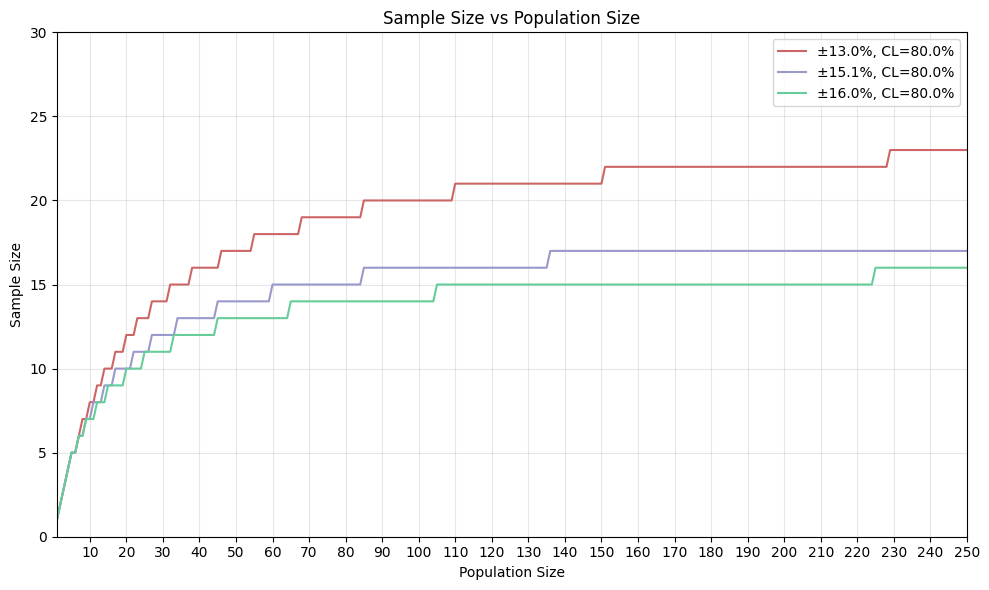

▶ Creating Excel workbook with separate Python code sheets...
▶ Generating graph for Scenario A (80.0%, ±13.0%)...
▶ Generating graph for Scenario B (80.0%, ±15.1%)...
▶ Generating graph for Scenario C (80.0%, ±16.0%)...
✓ Excel file created: Sample_Size_Tables_Graphs.xlsx
▶ Generating combined Python module...
✓ Combined Python module saved: sample_size_functions.py
▶ Creating README documentation...
✓ README file created
▶ Creating ZIP archive...
✓ ZIP archive created: 20250807_sample_size_analysis.zip

SAMPLE SIZE ANALYSIS COMPLETED SUCCESSFULLY!

Generated outputs for:
  • Scenario A (80.0%, ±13.0%)
  • Scenario B (80.0%, ±15.1%)
  • Scenario C (80.0%, ±16.0%)

All outputs packaged in: 20250807_sample_size_analysis.zip
  Date format: 20250807

Contents:
  📊 Excel file with all scenarios and Python code
  🖼️  Images folder with 4 graphs
  🐍 Python code folder with 4 scripts
  📝 README file with complete documentation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# =============================================================================
# Script Name : sample_size_table_enhanced.ipynb
# Purpose     : Calculate and visualize sample size tables for known populations
#               with different margin of errors and different confidence levels
#               AND generate Python code snippets for implementation
# Author      : Zane Wubbena, PhD
# Platform    : Google Colab
# Last Updated: 2025-08-05
# =============================================================================
#
# HOW TO CUSTOMIZE SCENARIOS:
# -------------------------
# 1. Modify the SCENARIOS array in Section 2 below
# 2. For each scenario, set:
#    - Z: Z-score (1.28=80%, 1.645=90%, 1.96=95%, 2.576=99%)
#    - Margin: Decimal margin of error (0.10=±10%, 0.15=±15%)
#    - Proportion: Expected proportion (use 0.50 for maximum variability)
# 3. Run the script - all outputs automatically update.
#
# Example: To change Scenario A to 95% confidence with ±10% margin:
#   "Z": 1.96,        # Changed from 1.28
#   "Margin": 0.10,   # Changed from 0.13
#
# HOW TO CUSTOMIZE DATE FORMAT:
# ----------------------------
# Change DATE_FORMAT in Section 2 to control output folder/file naming.
# Default includes date and time: 20250805_200119_sample_size_output.zip
#
# IMPORTANT: All names, descriptions, and code are dynamically generated.
# =============================================================================

# =============================================================================
# SECTION 1: Import Required Libraries
# =============================================================================

import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import shutil

from scipy import stats
from matplotlib.lines import Line2D
from datetime import datetime

!pip install -q xlsxwriter

# =============================================================================
# SECTION 2: User-Defined Parameters
# =============================================================================

# --- Scenario Control ---
RUN_SINGLE = False  # Set True to run only one scenario
SINGLE_SCENARIO_INDEX = 0  # Index of scenario to run if RUN_SINGLE = True

# Common z-score references for documentation
#  Z = 1.28  → 80% Confidence
#  Z = 1.645 → 90% Confidence
#  Z = 1.96  → 95% Confidence
#  Z = 2.576 → 99% Confidence

# --- Display Settings ---
POP_MIN = 1             # Minimum population size to display on the graph
POP_MAX = 250           # Maximum population size to display on the graph
# POP_MAX_ALL = 20000   # Total population size range used in calculations (not displayed)
SAMPLE_CAP = 30         # Maximum sample size shown on the graph

X_TICK_START = 0        # Starting point for x-axis ticks
X_TICK_INTERVAL = 10    # Interval between x-axis ticks

Y_TICK_START = 0        # Starting point for y-axis ticks
Y_TICK_INTERVAL = 5     # Interval between y-axis ticks

OUTPUT_DIR = "/content/"

# --- Date/Time Format Settings ---
# Choose preferred date format by uncommenting line of code:
# DATE_FORMAT = "%Y%m%d_%H%M%S"  # Default: 20250805_200119 (YYYYMMDD_HHMMSS)
DATE_FORMAT = "%Y%m%d"        # Just date: 20250805
# DATE_FORMAT = "%Y-%m-%d"      # With dashes: 2025-08-05
# DATE_FORMAT = "%b%d_%Y"       # Month name: Aug05_2025
# DATE_FORMAT = "%Y%m%d_v1"     # With version: 20250805_v1

# Date format components:
# %Y = 4-digit year (2025)
# %m = 2-digit month (08 for August)
# %d = 2-digit day (05)
# %H = Hour in 24-hour format (20 = 8 PM)
# %M = Minutes (01)
# %S = Seconds (19)
# %b = Abbreviated month name (Aug)

# --- Raw Scenario Values ---
# Modify these values to change the scenarios. All outputs will update automatically.
# Z-score examples: 1.28 (80%), 1.645 (90%), 1.96 (95%), 2.576 (99%)
# Margin: Decimal form of margin of error (e.g., 0.13 for ±13%)

# Margin of Error (ME) values below are set to the six-digit midpoints of the
# mutually exclusive ME ranges that yield sample sizes of 16 and 18 under the
# finite population correction formula. These values ensure accurate and stable
# modeling without overlap between adjacent sample size thresholds.

# ME = 0.150825 → corresponds to sample size of 18
# ME = 0.159994 → corresponds to sample size of 16
#
# Assumes:
# Confidence Level = 80% (z = 1.28)
# Population Proportion = 0.5
# Population Size = 20,000

SCENARIOS = [
    # Scenario A
    {
        "Z": 1.28,          # 80% confidence level
        "Margin": 0.13,     # ±13% margin of error
        "Proportion": 0.50,  # Expected proportion (0.5 = maximum variability)
        "LineStyle": "-",
        "LineColor": "#CC6666",
    },
    # Scenario B
    {
        "Z": 1.28,          # 80% confidence level
        "Margin": 0.150825,    # ±15.5% margin of error
        "Proportion": 0.50,
        "LineStyle": "-",
        "LineColor": "#9999CC",
    },
    # Scenario C
    {
        "Z": 1.28,          # 80% confidence level
        "Margin": 0.159994,     # ±16% margin of error
        "Proportion": 0.50,
        "LineStyle": "-",
        "LineColor": "#66CC99",
    },
]

# --- Validate and Process Scenarios ---
if len(SCENARIOS) > 26:
    print("⚠️ Warning: More than 26 scenarios. Letters will repeat after Z.")

# --- Dynamically Generate Scenario Names and Properties ---
for idx, scenario in enumerate(SCENARIOS):
    # Validate Z-score
    if scenario["Z"] <= 0:
        raise ValueError(f"Scenario {idx+1}: Z-score must be positive")

    # Validate Margin
    if not 0 < scenario["Margin"] < 1:
        raise ValueError(f"Scenario {idx+1}: Margin must be between 0 and 1")

    # Validate Proportion
    if not 0 < scenario["Proportion"] <= 1:
        raise ValueError(f"Scenario {idx+1}: Proportion must be between 0 and 1")

    # Calculate confidence level from Z-score
    confidence = round(2 * stats.norm.cdf(scenario["Z"]) - 1, 4)
    confidence_pct = round(confidence * 100, 1)
    margin_pct = round(scenario['Margin'] * 100, 1)

    # Store calculated values for reuse throughout the script
    scenario["Confidence"] = confidence
    scenario["ConfidencePct"] = confidence_pct
    scenario["MarginPct"] = margin_pct
    scenario["Letter"] = chr(65 + (idx % 26))  # Handles > 26 scenarios

    # Generate dynamic name - this will be used everywhere
    scenario["Name"] = f"Scenario {scenario['Letter']} ({confidence_pct}%, ±{margin_pct}%)"

    print(f"✓ Configured {scenario['Name']}")

# =============================================================================
# SECTION 3: Sample Size Calculation Function and Helpers
# =============================================================================

def calculate_sample_size(N, e, p, z):
    """
    Calculate sample size with finite population correction.

    Parameters:
    N: Population size
    e: Margin of error (decimal form)
    p: Expected proportion (typically 0.5)
    z: Z-score for desired confidence level
    """
    if N < 1:
        raise ValueError("Population must be >= 1")

    numerator = (z ** 2) * p * (1 - p)
    denominator = e ** 2
    n_0 = numerator / denominator
    adjusted_n = n_0 / (1 + ((n_0 - 1) / N))
    return min(math.ceil(adjusted_n), N)

def test_sample_size_calculation():
    """Test function to verify calculations are working correctly."""
    test_cases = [
        {"pop": 10, "expected_range": (3, 10)},
        {"pop": 100, "expected_range": (10, 50)},
        {"pop": 1000, "expected_range": (20, 100)},
    ]

    print("\nTesting sample size calculations:")
    for scenario in SCENARIOS[:1]:  # Test first scenario
        print(f"\nTesting {scenario['Name']}:")
        for test in test_cases:
            sample = calculate_sample_size(
                test["pop"],
                scenario["Margin"],
                scenario["Proportion"],
                scenario["Z"]
            )
            in_range = test["expected_range"][0] <= sample <= test["expected_range"][1]
            status = "✓" if in_range else "✗"
            print(f"  Population {test['pop']:4d} → Sample {sample:3d} {status}")

    return True

# Run test
test_sample_size_calculation()

# =============================================================================
# NEW SECTION: Python Code Generation Functions
# =============================================================================

def parse_population_range(range_str):
    """Parse population range string to get min and max values."""
    if '-' in str(range_str):
        parts = str(range_str).split('-')
        return int(parts[0]), int(parts[1])
    else:
        return int(range_str), int(range_str)

def generate_python_code(scenario_name, scenario_letter, grouped_df, z_score, margin_pct, confidence_pct):
    """
    Generate Python code snippet for a given scenario's sample size table.
    """
    # Start building the Python code
    code_lines = []

    # Add header comment
    code_lines.append(f'"""\nSample Size Assignment Function')
    code_lines.append(f'Scenario: {scenario_name}')
    code_lines.append(f'Confidence Level: {confidence_pct}%')
    code_lines.append(f'Margin of Error: ±{margin_pct}%')
    code_lines.append(f'Z-Score: {z_score}')
    code_lines.append(f'Generated on: {datetime.now().strftime("%Y-%m-%d")}')
    code_lines.append('"""\n')

    # Function definition using scenario letter
    func_name = f"get_sample_size_{scenario_letter.lower()}"
    code_lines.append(f'def {func_name}(population):')
    code_lines.append('    """')
    code_lines.append(f'    Returns sample size for {scenario_name}.')
    code_lines.append(f'    Confidence Level: {confidence_pct}%, Margin of Error: ±{margin_pct}%')
    code_lines.append('    ')
    code_lines.append('    Parameters:')
    code_lines.append('    population (int): Population size')
    code_lines.append('    ')
    code_lines.append('    Returns:')
    code_lines.append('    int: Required sample size')
    code_lines.append('    """')

    # Generate if-elif statements
    for idx, row in grouped_df.iterrows():
        sample_size = row['Sample_Size']
        pop_range = row['Population_Range']
        pop_min, pop_max = parse_population_range(pop_range)

        if idx == 0:
            if pop_min == pop_max:
                code_lines.append(f'    if population == {pop_min}:')
            else:
                code_lines.append(f'    if {pop_min} <= population <= {pop_max}:')
        else:
            if pop_min == pop_max:
                code_lines.append(f'    elif population == {pop_min}:')
            else:
                code_lines.append(f'    elif {pop_min} <= population <= {pop_max}:')

        code_lines.append(f'        return {sample_size}')

    # Add else clause for populations beyond the table
    max_pop = grouped_df.iloc[-1]["Population_Range"].split("-")[-1] if "-" in str(grouped_df.iloc[-1]["Population_Range"]) else grouped_df.iloc[-1]["Population_Range"]
    code_lines.append('    else:')
    code_lines.append(f'        # For populations > {max_pop}')
    code_lines.append(f'        return {grouped_df.iloc[-1]["Sample_Size"]}')

    return '\n'.join(code_lines)

def generate_dataframe_code(scenario_name, scenario_letter, grouped_df):
    """
    Generate Python code that applies sample sizes to a pandas DataFrame.
    """
    func_name = f"get_sample_size_{scenario_letter.lower()}"

    code_lines = []
    code_lines.append('\n# Example usage with pandas DataFrame:')
    code_lines.append('import pandas as pd')
    code_lines.append('import numpy as np\n')

    code_lines.append(f'def apply_sample_sizes_{scenario_letter.lower()}(df, population_col):')
    code_lines.append('    """')
    code_lines.append('    Apply sample sizes to a dataframe based on population column.')
    code_lines.append('    ')
    code_lines.append('    Parameters:')
    code_lines.append('    df (pd.DataFrame): Input dataframe')
    code_lines.append('    population_col (str): Name of column containing population counts')
    code_lines.append('    ')
    code_lines.append('    Returns:')
    code_lines.append('    pd.DataFrame: DataFrame with added SAMPLE_SIZE column')
    code_lines.append('    """')
    code_lines.append('    df = df.copy()')
    code_lines.append(f'    df["SAMPLE_SIZE"] = df[population_col].apply({func_name})')
    code_lines.append('    return df\n')

    code_lines.append('# Example:')
    code_lines.append('# data = {')
    code_lines.append('#     "DISTRICT_ID": ["D001", "D002", "D003", "D004", "D005"],')
    code_lines.append('#     "POPULATION": [5, 25, 50, 100, 250]')
    code_lines.append('# }')
    code_lines.append('# df = pd.DataFrame(data)')
    code_lines.append(f'# result = apply_sample_sizes_{scenario_letter.lower()}(df, "POPULATION")')
    code_lines.append('# print(result)')

    return '\n'.join(code_lines)

def generate_csv_export_code(scenario_name, scenario_letter, grouped_df):
    """
    Generate code to export the sample size table as CSV.
    """
    code_lines = []
    code_lines.append('\n# Export sample size table to CSV:')
    code_lines.append('sample_size_table = pd.DataFrame({')
    code_lines.append('    "Sample_Size": [')

    # Add sample sizes
    sizes = ', '.join(str(s) for s in grouped_df['Sample_Size'].tolist())
    code_lines.append(f'        {sizes}')
    code_lines.append('    ],')
    code_lines.append('    "Population_Range": [')

    # Add population ranges
    ranges = ', '.join(f'"{r}"' for r in grouped_df['Population_Range'].tolist())
    code_lines.append(f'        {ranges}')
    code_lines.append('    ]')
    code_lines.append('})')
    code_lines.append(f'\n# Save to CSV')
    code_lines.append(f'# sample_size_table.to_csv("sample_size_table_{scenario_letter.lower()}.csv", index=False)')

    return '\n'.join(code_lines)

# =============================================================================
# SECTION 4: Display Configuration Summary
# =============================================================================

print("\n" + "="*60)
print("CONFIGURATION SUMMARY")
print("="*60)

# Create summary table
config_df = pd.DataFrame([
    {
        "Scenario": s["Name"],
        "Z-Score": s["Z"],
        "Confidence": f"{s['ConfidencePct']}%",
        "Margin": f"±{s['MarginPct']}%",
        "Proportion": s["Proportion"]
    }
    for s in SCENARIOS
])

print(config_df.to_string(index=False))
print("="*60 + "\n")

# =============================================================================
# SECTION 5: Create Output Directory Structure
# =============================================================================

# Create a timestamped folder for all outputs
# Uses the DATE_FORMAT specified in the configuration section
today_str = datetime.today().strftime(DATE_FORMAT)

output_folder_name = f"{today_str}_sample_size_output"
output_folder_path = os.path.join(OUTPUT_DIR, output_folder_name)

# Create subdirectories
os.makedirs(output_folder_path, exist_ok=True)
images_folder = os.path.join(output_folder_path, "images")
python_folder = os.path.join(output_folder_path, "python_code")
os.makedirs(images_folder, exist_ok=True)
os.makedirs(python_folder, exist_ok=True)

print(f"▶ Created output folder: {output_folder_name}")

# =============================================================================
# SECTION 6: Run All or Single Scenario(s)
# =============================================================================

scenarios_to_run = [SCENARIOS[SINGLE_SCENARIO_INDEX]] if RUN_SINGLE else SCENARIOS
plot_df = pd.DataFrame()
scenario_summary = []

print("Starting sample size calculations...\n")

for scenario in scenarios_to_run:
    name = scenario["Name"]
    z = scenario["Z"]
    e = scenario["Margin"]
    p = scenario["Proportion"]
    confidence_pct = scenario["ConfidencePct"]
    margin_pct = scenario["MarginPct"]

    print(f"▶ Processing {name}...")

    # Generate full sample size dataset
    df = pd.DataFrame({
        "Population_Size": range(1, 20001)
    })
    df["Sample_Size"] = df["Population_Size"].apply(lambda N: calculate_sample_size(N, e, p, z))
    df["Truncated_Sample_Size"] = df["Sample_Size"].apply(lambda x: min(x, SAMPLE_CAP))

    # Group population ranges by sample size
    grouped = df.groupby("Sample_Size")["Population_Size"].agg(["min", "max"]).reset_index()
    grouped["Population_Range"] = grouped.apply(
        lambda row: f"{row['min']}" if row["min"] == row["max"]
        else f"{row['min']}-{row['max']}", axis=1
    )
    grouped = grouped[["Sample_Size", "Population_Range"]]

    # Generate Python code for this scenario
    python_code = generate_python_code(name, scenario["Letter"], grouped, z, margin_pct, confidence_pct)
    dataframe_code = generate_dataframe_code(name, scenario["Letter"], grouped)
    csv_code = generate_csv_export_code(name, scenario["Letter"], grouped)
    full_code = python_code + '\n' + dataframe_code + '\n' + csv_code

    scenario["PythonCode"] = full_code

    # Save summary info
    max_sample = df["Sample_Size"].max()
    scenario_summary.append({
        "Scenario": name,
        "Z-Score": z,
        "Confidence_Level": f"{confidence_pct}%",
        "Margin_of_Error": f"±{margin_pct}%",
        "Max_Sample_Size": max_sample
    })

    # Save plot-specific data
    temp = df[df["Population_Size"].between(POP_MIN, POP_MAX)].copy()
    temp["Scenario"] = name
    temp["LineStyle"] = scenario["LineStyle"]
    temp["LineColor"] = scenario["LineColor"]
    plot_df = pd.concat([plot_df, temp], ignore_index=True)

    # Save grouped range data for Excel
    scenario["DataFrame_Grouped"] = grouped

# =============================================================================
# SECTION 7: Create Line Graph
# =============================================================================

print("▶ Creating combined line graph...")
plt.figure(figsize=(10, 6))

for scenario in scenarios_to_run:
    temp = plot_df[plot_df["Scenario"] == scenario["Name"]]

    # Use pre-calculated values for consistency
    label = f"±{scenario['MarginPct']}%, CL={scenario['ConfidencePct']}%"

    # Plot each scenario
    plt.plot(
        temp["Population_Size"],
        temp["Truncated_Sample_Size"],
        label=label,
        linestyle=scenario["LineStyle"],
        color=scenario["LineColor"],
        linewidth=1.5
    )

plt.xlabel("Population Size")
plt.ylabel(f"Sample Size")
plt.title("Sample Size vs Population Size")
plt.xticks(range(X_TICK_START, POP_MAX + 1, X_TICK_INTERVAL))
plt.yticks(range(0, SAMPLE_CAP+1, Y_TICK_INTERVAL))
plt.ylim(0, SAMPLE_CAP)
plt.xlim(POP_MIN, POP_MAX)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()

# Save plot image
graph_path = os.path.join(images_folder, "all_scenarios_plot.png")
plt.savefig(graph_path, dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# SECTION 8: Export to Excel with Separate Python Code Sheets
# =============================================================================

print("▶ Creating Excel workbook with separate Python code sheets...")
excel_filename = "Sample_Size_Tables_Graphs.xlsx"
excel_path = os.path.join(output_folder_path, excel_filename)
summary_df = pd.DataFrame(scenario_summary)

with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
    workbook = writer.book

    # Define formats
    header_format = workbook.add_format({
        'bold': True,
        'bg_color': '#F7F7F8',
        'border': 1,
        'align': 'center',
        'valign': 'vcenter'
    })

    code_format = workbook.add_format({
        'font_name': 'Courier New',
        'font_size': 10,
        'bg_color': '#F5F5F5',
        'text_wrap': False,
        'valign': 'top'
    })

    # Sheet 1: Scenario Summary + All-Scenario Graph
    summary_df.to_excel(writer, sheet_name="Scenario Summary", index=False)
    summary_ws = writer.sheets["Scenario Summary"]
    summary_ws.set_column('A:E', 22)

    # Apply header format to Scenario Summary
    for col_num, value in enumerate(summary_df.columns.values):
        summary_ws.write(0, col_num, value, header_format)

    if os.path.exists(graph_path):
        summary_ws.insert_image("A7", graph_path, {"x_scale": 0.8, "y_scale": 0.8})

    # Create individual sheets for each scenario (data sheet + python sheet)
    for scenario in scenarios_to_run:
        scenario_name = scenario["Name"]
        scenario_letter = scenario["Letter"]
        grouped = scenario["DataFrame_Grouped"]
        python_code = scenario["PythonCode"]

        # Create scenario-specific graph
        print(f"▶ Generating graph for {scenario_name}...")
        plt.figure(figsize=(10, 6))
        temp = plot_df[plot_df["Scenario"] == scenario_name]
        plt.plot(
            temp["Population_Size"],
            temp["Truncated_Sample_Size"],
            label=scenario_name,
            linestyle=scenario["LineStyle"],
            color=scenario["LineColor"],
            linewidth=2
        )
        plt.xlabel("Population Size")
        plt.ylabel(f"Sample Size")
        plt.title(f"Sample Size vs Population Size\n{scenario_name}")
        plt.xticks(range(X_TICK_START, POP_MAX + 1, X_TICK_INTERVAL))
        plt.yticks(range(0, SAMPLE_CAP + 1, Y_TICK_INTERVAL))
        plt.ylim(0, SAMPLE_CAP)
        plt.xlim(POP_MIN, POP_MAX)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='upper right')
        plt.tight_layout()

        # Save unique graph for this scenario
        graph_filename = f"scenario_{scenario_letter}_plot.png"
        graph_path_scenario = os.path.join(images_folder, graph_filename)
        plt.savefig(graph_path_scenario, dpi=300, bbox_inches='tight')
        plt.close()

        # Sheet: Scenario Data and Graph
        grouped.to_excel(writer, sheet_name=scenario_name, index=False)
        ws = writer.sheets[scenario_name]
        ws.set_column('A:B', 25)

        # Apply header format
        for col_num, value in enumerate(grouped.columns.values):
            ws.write(0, col_num, value, header_format)

        if os.path.exists(graph_path_scenario):
            ws.insert_image("C2", graph_path_scenario, {"x_scale": 0.8, "y_scale": 0.8})

        # Sheet: Python Code for this scenario
        code_sheet_name = f"Scenario {scenario_letter} (Python)"
        code_ws = workbook.add_worksheet(code_sheet_name)
        code_ws.set_column('A:A', 100)  # Wide column for code

        # Write header
        code_ws.write(0, 0, f"Python Code for {scenario_name}", header_format)

        # Write code line by line
        row = 2
        for line in python_code.split('\n'):
            code_ws.write(row, 0, line, code_format)
            row += 1

        # Save Python code as separate file
        code_filename = f"sample_size_{scenario['Letter'].lower()}.py"
        code_path = os.path.join(python_folder, code_filename)
        with open(code_path, 'w') as f:
            f.write(python_code)

print(f"✓ Excel file created: {excel_filename}")

# =============================================================================
# SECTION 9: Generate Combined Python Module
# =============================================================================

print("▶ Generating combined Python module...")

combined_code = []
combined_code.append('"""')
combined_code.append('Combined Sample Size Assignment Functions')
combined_code.append(f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')
combined_code.append('')
combined_code.append('Configuration:')
for s in scenarios_to_run:
    combined_code.append(f'  {s["Name"]}: Z={s["Z"]}, CL={s["ConfidencePct"]}%, ME=±{s["MarginPct"]}%')
combined_code.append('')
combined_code.append('This module contains sample size assignment functions for all configured scenarios.')
combined_code.append('"""')
combined_code.append('')
combined_code.append('import pandas as pd')
combined_code.append('import numpy as np')
combined_code.append('')

# Add all scenario functions
for scenario in scenarios_to_run:
    scenario_name = scenario["Name"]
    scenario_letter = scenario["Letter"]
    grouped = scenario["DataFrame_Grouped"]
    z = scenario["Z"]
    confidence_pct = scenario["ConfidencePct"]
    margin_pct = scenario["MarginPct"]

    # Generate just the function code (not the full code with examples)
    func_code = generate_python_code(scenario_name, scenario_letter, grouped, z, margin_pct, confidence_pct)
    combined_code.append(func_code)
    combined_code.append('')

# Add a master function that can handle all scenarios
combined_code.append('def get_sample_size(population, confidence_level=None, margin_of_error=None, scenario="A"):')
combined_code.append('    """')
combined_code.append('    Master function to get sample size based on scenario or parameters.')
combined_code.append('    ')
combined_code.append('    Parameters:')
combined_code.append('    population (int): Population size')
combined_code.append('    confidence_level (float): Confidence level (e.g., 0.80 for 80%)')
combined_code.append('    margin_of_error (float): Margin of error (e.g., 0.13 for ±13%)')
combined_code.append('    scenario (str): Scenario letter (A, B, C, etc.) if not using custom parameters')
combined_code.append('    ')
combined_code.append('    Returns:')
combined_code.append('    int: Required sample size')
combined_code.append('    """')
combined_code.append('    ')
combined_code.append('    # Map scenarios to functions')
combined_code.append('    scenario_map = {')

for scenario in scenarios_to_run:
    letter = scenario["Letter"]
    combined_code.append(f'        "{letter}": get_sample_size_{letter.lower()},')

combined_code.append('    }')
combined_code.append('    ')
combined_code.append('    if scenario.upper() in scenario_map:')
combined_code.append('        return scenario_map[scenario.upper()](population)')
combined_code.append('    else:')
combined_code.append('        raise ValueError(f"Unknown scenario: {scenario}. Available: {list(scenario_map.keys())}")')

# Add usage examples
combined_code.append('')
combined_code.append('')
combined_code.append('# Usage Examples:')
combined_code.append('# -------------')
combined_code.append('# 1. Direct function call:')
combined_code.append('#    sample_size = get_sample_size_a(population=150)')
combined_code.append('#')
combined_code.append('# 2. Using master function:')
combined_code.append('#    sample_size = get_sample_size(population=150, scenario="A")')
combined_code.append('#')
combined_code.append('# 3. Apply to DataFrame:')
combined_code.append('#    df["SAMPLE_SIZE"] = df["POPULATION"].apply(lambda x: get_sample_size(x, scenario="B"))')

# Save combined module
combined_filename = "sample_size_functions.py"
combined_path = os.path.join(python_folder, combined_filename)
with open(combined_path, 'w') as f:
    f.write('\n'.join(combined_code))

print(f"✓ Combined Python module saved: {combined_filename}")

# =============================================================================
# SECTION 10: Create README file
# =============================================================================

print("▶ Creating README documentation...")

readme_content = f"""# Sample Size Calculator Output
Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## Contents

### 📊 Excel File
- `Sample_Size_Tables_Graphs.xlsx`: Complete workbook with all scenarios, graphs, and Python code

### 🖼️ Images Folder
- `all_scenarios_plot.png`: Combined graph showing all scenarios
"""

for scenario in scenarios_to_run:
    readme_content += f"- `scenario_{scenario['Letter']}_plot.png`: Individual graph for {scenario['Name']}\n"

readme_content += """
### 🐍 Python Code Folder
- `sample_size_functions.py`: Combined module with all scenario functions
"""

for scenario in scenarios_to_run:
    readme_content += f"- `sample_size_{scenario['Letter'].lower()}.py`: Standalone code for {scenario['Name']}\n"

readme_content += "\n## Scenario Parameters\n"

for scenario in scenarios_to_run:
    readme_content += f"\n### {scenario['Name']}"
    readme_content += f"\n- Confidence Level: {scenario['ConfidencePct']}%"
    readme_content += f"\n- Margin of Error: ±{scenario['MarginPct']}%"
    readme_content += f"\n- Z-Score: {scenario['Z']}"

readme_content += """

## Usage

### Using the Combined Module:
```python
from sample_size_functions import get_sample_size

# Get sample size for a specific scenario
sample_size = get_sample_size(population=150, scenario="A")

# Apply to a DataFrame
import pandas as pd
df = pd.DataFrame({"DISTRICT_ID": ["D001", "D002"], "POPULATION": [50, 200]})
df["SAMPLE_SIZE"] = df["POPULATION"].apply(lambda x: get_sample_size(x, scenario="B"))
```

### Using Individual Scenario Files:
```python
from sample_size_a import get_sample_size_a

sample_size = get_sample_size_a(population=100)
```

## Excel Workbook Structure

1. **Scenario Summary**: Overview of all scenarios with combined graph
"""

# Dynamically generate sheet listing
sheet_num = 2
for scenario in scenarios_to_run:
    readme_content += f"{sheet_num}. **{scenario['Name']}**: Data table and graph\n"
    sheet_num += 1
    readme_content += f"{sheet_num}. **Scenario {scenario['Letter']} (Python)**: Python code for {scenario['Name']}\n"
    sheet_num += 1

readme_content += """
## Notes

- All scenario parameters are dynamically calculated from the Z-score and margin values
- To modify scenarios, edit the SCENARIOS array in the script
- The system supports any number of scenarios (A, B, C, ...)
- All outputs automatically reflect the configured parameters
"""

readme_path = os.path.join(output_folder_path, "README.md")
with open(readme_path, 'w') as f:
    f.write(readme_content)

print("✓ README file created")

# =============================================================================
# SECTION 11: Create ZIP Archive
# =============================================================================

print("▶ Creating ZIP archive...")

# ZIP filename matches the folder structure
zip_filename = f"{today_str}_sample_size_analysis.zip"
zip_path = os.path.join(OUTPUT_DIR, zip_filename)

# Create ZIP file
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Walk through the output folder and add all files
    for root, dirs, files in os.walk(output_folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, OUTPUT_DIR)
            zipf.write(file_path, arcname)

print(f"✓ ZIP archive created: {zip_filename}")

# =============================================================================
# SECTION 12: Completion Message
# =============================================================================

print("\n" + "="*60)
print("SAMPLE SIZE ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)

# Display final summary
print("\nGenerated outputs for:")
for scenario in scenarios_to_run:
    print(f"  • {scenario['Name']}")

print(f"\nAll outputs packaged in: {zip_filename}")
print(f"  Date format: {today_str}")
print(f"\nContents:")
print(f"  📊 Excel file with all scenarios and Python code")
print(f"  🖼️  Images folder with {len(scenarios_to_run) + 1} graphs")
print(f"  🐍 Python code folder with {len(scenarios_to_run) + 1} scripts")
print(f"  📝 README file with complete documentation")
print("="*60)

# Automatically download the ZIP file
from google.colab import files
files.download(zip_path)

# Optional: Clean up the uncompressed folder after creating ZIP
# shutil.rmtree(output_folder_path)
# print(f"✓ Temporary folder cleaned up")

# =============================================================================
# Python Program End
# =============================================================================